In [1]:
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
from scipy.stats import spearmanr
from scipy import stats
from statsmodels.nonparametric.smoothers_lowess import lowess


In [4]:
import os
os.getcwd()
# os.chdir(path)

'/Users/KIOSK/home/git/Hypergraphs'

In [5]:
#Set edge-size cutoff here
max_size = 9999999

In [6]:
def rd(filename):
    f = open('datasets/{0}.txt'.format(filename),'r')
    file = f.read().splitlines()
    f.close()

    V = set()
    E = []
    Vstart = file.index('nodes')
    Estart = file.index('edges')
    end = len(file)
    for i in range(Vstart+1,Estart):
        V.add(file[i])
    for i in range(Estart+1,end):
        if (len(eval(file[i]))<=max_size):
            E.append(eval(file[i]))
    return V,E


In [7]:
def rd_abcdh(filename):
    f = open('datasets/{0}.txt'.format(filename),'r')
    file = f.read().splitlines()
    f.close()
    V = set()
    E = []
    end = len(file)
    for i in range(1,end):
        E.append(file[i].split(","))
    V = set([item for sublist in E for item in sublist])
    return V,E

In [8]:
#Create a new text file for a given hypergraph
#V: vertices
#E: edges
#filename: The file name you want
def write_data(V,E,filename):
    f = open('datasets/{0}.txt'.format(filename),'w')
    f.write('nodes\n')
    for v in V:
        f.write('{0}\n'.format(v))
    f.write('edges\n')
    
    if type(E[0]) is list:
        E = [['{0}'.format(str(v)) for v in e] for e in E]
    else:
        E = [{'{0}'.format(str(v)) for v in e} for e in E]

    for e in E:
        f.write('{0}\n'.format(e))
    f.close()

In [30]:
#You can replace this with your own files, or get V and E in a different way
#Read the README if you want to add your own txt file
filenames = {'hospital-lyon',
             'NDC-substances',
             'email-eu',
             'tags-math-sx',
             'tags-ask-ubuntu',
             'email-enron',
             'contact-primary-school',
             'contact-high-school',
             'diseasome',
             'disgenenet'
            }
#filenames={'test'}


In [14]:
filenames={'ABCD-h_seed_1234_od_Bogumila',
           'ABCD-h_seed_1235'}

In [15]:
#Get a dictionary of vertex -> edges containing vertex.

#V: vertices
#E: edges

def edge_sets(V,E):
    #Initalize edge_set
    edge_sets = {v : [] for v in V}
    #iterate through E and update edge_sets
    for e in E:
        for v in e:
            edge_sets[v].append(e)
    return edge_sets

def node_sets(V,E):
    #Initalize edge_set
    node_sets = {e : [] for e in E}
    #iterate through E and update node_sets
    for e in E:
        for v in e:
            node_sets[e].append(v)
    return node_sets

In [23]:
def plot_and_corr(x_expr,y_expr):
    x=eval(x_expr)
    y=eval(y_expr)
    #smoothed = lowess(y, x)


    plt.plot(x, y, 'o')
    plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), label='Linear fit')
    plt.plot(sorted(x), np.poly1d(np.polyfit(x, y, 2))(sorted(x)), label='Quadratic fit')
    # Plot smoothed data


    # Fit LOESS line
#    lowess = sm.nonparametric.lowess(y, x, frac=.1, it=10)
 #   x_smooth = lowess[:, 0]
  #  y_smooth = lowess[:, 1]

    # Plot LOESS line
   # plt.plot(x_smooth, y_smooth, color='red', label='LOESS')

    
    # Add legend in top-right corner
    plt.legend(loc='upper right')

    
    
    #plt.plot(smoothed[:, 0], smoothed[:, 1], 'r-', label='LOESS')
    
    plt.xlabel('degree '+x_expr)
    plt.ylabel('edge size '+y_expr)
    plt.title('{0}'.format(filename))
    
    #Comment/uncomment depending on what you want
    plt.savefig('pics/UniformPairsLogLog/{0}.png'.format(filename))
    plt.show()
    plt.close()
    pearson_coef, p_value = stats.pearsonr(x, y)

    print(f"Pearson Correlation Coefficient: {pearson_coef} (p-value={p_value})")
    #print(f"P-value: {p_value}")
    coef, p = spearmanr(x, y)
    print('Spearmans correlation coefficient: %.2f' % coef, '(p-value=%.5f)' % p)

In [20]:
def add(list,constant):
    return([list_element + constant for list_element in list])

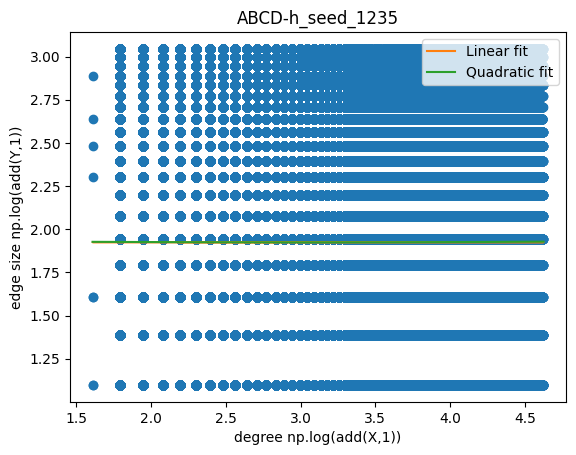

Pearson Correlation Coefficient: -9.223097696224884e-05 (p-value=0.9237221341558419)
Spearmans correlation coefficient: -0.00 (p-value=0.61209)


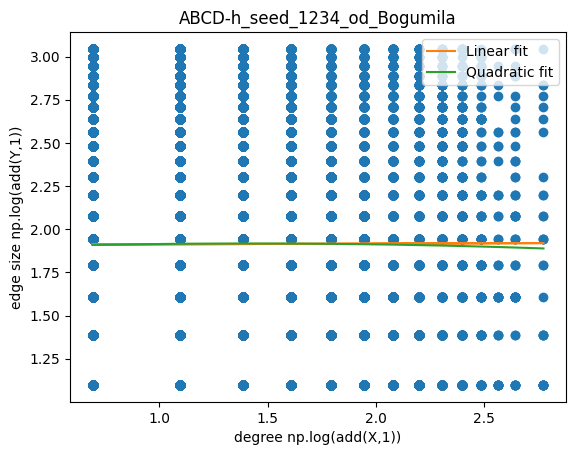

Pearson Correlation Coefficient: 0.00290330490603087 (p-value=0.43184152489141503)
Spearmans correlation coefficient: 0.00 (p-value=0.19771)


In [24]:
for filename in filenames:    
    #Get V and E from the data
    #V,E = rd(filename)
    V,E = rd_abcdh(filename)

    def edge_sets(V,E):
        #Initalize edge_set
        edge_sets = {v : [] for v in V}
    #iterate through E and update edge_sets
        for e in E:
            for v in e:
                edge_sets[v].append(e)
        return edge_sets
    
    edge_sets = edge_sets(V,E)
    degrees = {v : len(edge_sets[v]) for v in V}
    edge_sizes = {d : [] for d in set(degrees.values())}
    X = []
    Y = []
    for v in V:
        if degrees[v] > 0:
            edge_sizes[degrees[v]].extend([len(e) for e in edge_sets[v]])
        for e in edge_sets[v]:
            X.append(degrees[v])
            Y.append(len(e))
    
    
    
    #plot_and_corr('X','Y')
#    plot_and_corr('np.log(add(X,1))','Y')
    plot_and_corr('np.log(add(X,1))','np.log(add(Y,1))')
        
    # plt.plot(X, Y, 'o')
    # plt.plot(X, np.poly1d(np.polyfit(X, Y, 1))(X))
    # plt.plot(sorted(X), np.poly1d(np.polyfit(X, Y, 2))(sorted(X)))
    # plt.xlabel('Node degree')
    # plt.ylabel('Hiperedge size')
    # plt.title('{0}'.format(filename))
     #plt.savefig('pics//{0}-avgDeg-vs-edge-size.png'.format(filename))
    # plt.show()
    
    # pearson_coef, p_value = stats.pearsonr(X, Y)
    # print(f"Assortativity Pearson Correlation Coefficient: {pearson_coef} (p-value={p_value})")
    
    # node_sets = node_sets(V,E)
    # hedgeSize = {e: len(e) for e in E}
    edgeSize = []
    avgDegree = []
    avgLogDegree=[]
    for e in E:
        edgeSize.append(len(e))
        avgDegCalc=0
        avgLogDegreeCalc=0
        for node in e:
            avgDegCalc=avgDegCalc+degrees[node]
            avgLogDegreeCalc=avgLogDegreeCalc+np.log(degrees[node])
        avgDegCalc = avgDegCalc / len(e)
        avgDegree.append(avgDegCalc)
        avgLogDegreeCalc = avgLogDegreeCalc / len(e)
        avgLogDegree.append(avgLogDegreeCalc)
    #print(edgeSize)
    #print(avgDegree)
        
    ######PLOTS######
    d_list = sorted(edge_sizes.keys())
    x = []
    y = []
    for d in d_list:
        #x.append(d)
        if len(edge_sizes[d]) > 0:
            x.append(d)
            y.append(sum(edge_sizes[d])/len(edge_sizes[d]))
        #else:
         #   y.append(0)
    #plot_and_corr('x','y')
    # plot_and_corr('np.log(add(x,1))','y')
    # plot_and_corr('np.log(add(x,1))','np.log(add(y,1))')
    # plot_and_corr('avgLogDegree','np.log(edgeSize)')
    # plot_and_corr('avgDegree','edgeSize')
    # plot_and_corr('np.log(avgDegree)','edgeSize')
    # plot_and_corr('np.log(avgDegree)','np.log(edgeSize)')
    
